# Imbalanced Data | Machine Learning

#New Database and training

In [4]:
import random
import pandas as pd
import numpy as np
import seaborn as sns


In [5]:
dataset = pd.read_csv('credit_data.csv')
dataset.shape

(2000, 5)

In [6]:
# checking NaN or missing values
pd.isna(dataset).sum()

,0
i#clientid,0
income,0
age,3
loan,0
c#default,0


In [7]:
#removing 3 missing values
dataset.dropna(inplace=True)
dataset.shape


(1997, 5)

In [8]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


# Spliting Database in **label** and **class**

In [9]:
#For training and test: split database in "label" and "class"
x = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 4].values

In [10]:
# x as label
x

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [11]:
# y as class
y

array([0, 0, 0, ..., 1, 0, 0])

# Training and Test

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

In [13]:
x_train.shape, y_train.shape

((1597, 3), (1597,))

In [14]:
x_test.shape, y_test.shape

((400, 3), (400,))

In [15]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [16]:
1714/ len(dataset), 283/len(dataset)

(0.8582874311467201, 0.14171256885327993)

value 0= 86% / value 1= 14%
"Let's assume 0 as paying the loan (1714) and 1 as not (283)"

In [17]:
#stratified sample check
np.unique(y_train, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [18]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([343,  57]))

In [19]:
57/len(y_test)

0.1425

# Naïve Bayes Classification

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [22]:
prevision= model.predict(x_test)
prevision

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [23]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
# testing accuracy from predective model (Result = 92%)
accuracy_score(prevision, y_test)

0.925

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(prevision, y_test)

array([[335,  22],
       [  8,  35]])

<Axes: >

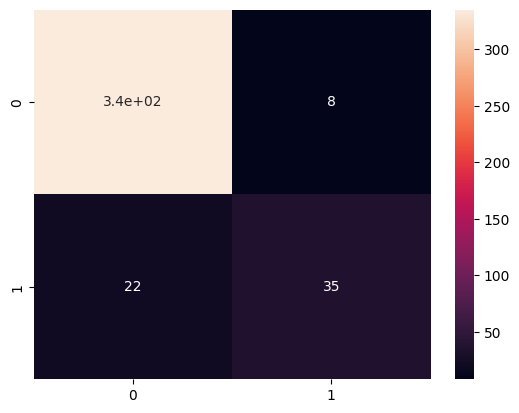

In [27]:
sns.heatmap(confusion_matrix(y_test, prevision), annot=True)

# Accuracy test

In [34]:
#testing accuracy from all model
(336+31) / (336+26+7+31)

0.9175

In [35]:
# pay the loan (sucess %)
336/(336+26)

0.9281767955801105

In [36]:
# not pay the loan (sucess %)
31/(31+7)

0.8157894736842105

At this point, we have an 18%  error, which means: the system allows loans to sensitive clients (bad score).


# Undersampling - Tomek Links

In [62]:
x.shape, y.shape

((1997, 3), (1997,))

In [32]:
from imblearn.under_sampling import TomekLinks

In [72]:
# Resampling only the majority class
undersampling= TomekLinks(sampling_strategy='majority')
x_under, y_under = undersampling.fit_resample(x, y)
x_under.shape, y_under.shape


((1897, 3), (1897,))

Undersampling technique removed 100 logs from database.

In [73]:
# original database
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [65]:
# new database after undersampling
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [78]:
# test fixed in 20% | stratified sample
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(x_under, y_under, test_size = 0.2, stratify = y_under)

In [79]:
x_train_under.shape, x_test_under.shape

((1517, 3), (380, 3))

In [81]:
model = GaussianNB()
model.fit(x_train_under, y_train_under)
predictions = model.predict(x_test_under)

In [83]:
accuracy_score(predictions, y_test_under)

0.9263157894736842

In [84]:
matrix_under = confusion_matrix(predictions, y_test_under)
matrix_under

array([[317,  22],
       [  6,  35]])

In [85]:
317/(317+22)


0.9351032448377581

In [86]:
35/(35+6)

0.8536585365853658

Accuracy has been increased in both cases, but it needs to be more sufficient to prevent money loss.





--------------



# Oversampling - SMOTE

In [87]:
from imblearn.over_sampling import SMOTE

In [90]:
sm= SMOTE(sampling_strategy='minority')
x_smote, y_smote = sm.fit_resample(x, y)
x_smote.shape, y_smote.shape

((3428, 3), (3428,))

In [91]:
# originl logs
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [92]:
# balanced logs
np.unique(y_smote, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [115]:
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size = 0.2, stratify = y_smote)

In [116]:
x_train_smote.shape, x_test_smote.shape

((2742, 3), (686, 3))

In [117]:
model = GaussianNB()
model.fit(x_train_smote, y_train_smote)
predictions = model.predict(x_test_smote)
accuracy_score(predictions, y_test_smote)

0.9256559766763849

In [118]:
cm_smote = confusion_matrix(predictions, y_test_smote)
cm_smote

array([[306,  14],
       [ 37, 329]])

In [119]:
291/(291+16)

0.9478827361563518

In [120]:
327/(327+52)

0.862796833773087

After oversampling, we have a 14% error rate, which means that accuracy has increased by 4%. For example, in 1000 clients, this represents 40 clients.